In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import warnings

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
PATH_DATA='../data/raw/'
PATH_DATA_INTERIM='../data/interim/'

In [4]:
df1 = pd.read_csv(PATH_DATA_INTERIM+'iter1_interim_cln.csv')

In [5]:
df1.sample()

,id,time,street,median_length,median_delay,median_speed_kmh,total_records,level,time2,hours,...,streettime2,is_train,weekendmean,weekendstd,weekdaysmean,weekdaysstd,weekdaysmean69,weekdaysstd69,weekdaysmean1518,weekdaysstd1518
90103,36901073,2022-08-30 07:00:00.000,Jenderal Ahmad Yani,776.0,142.0,11.72,4,3,2022-08-30 07:00:00,7,...,Jenderal Ahmad Yani_2022-08-30 07:00:00.000,1,0.0,0.0,2.901961,0.806347,2.901961,0.806347,0.0,0.0


In [6]:
## we use 1 as turn over
col_used = list(set(df1.columns)-set(['id','is_train','level','time','time2','street','streettime','streettime2']))
col_used.sort() ## --> remember to sort

In [7]:
Xtrain = df1[df1.is_train == 1][col_used]
Ytrain = df1[df1.is_train == 1]['level']

Xtest = df1[df1.is_train == 0][col_used]
Ytest = df1[df1.is_train == 0]['level']

In [8]:
Ytrain.mean(), Ytest.mean()

(2.4188851447968864, 2.429523525315826)

Transformation

In [9]:
SS = StandardScaler()

In [10]:
SS.fit(Xtrain)
Xtrain_ss = pd.DataFrame(SS.transform(Xtrain), columns = col_used)
Xtest_ss = pd.DataFrame(SS.transform(Xtest), columns = col_used)

In [11]:
dctree = DecisionTreeClassifier().fit(Xtrain_ss, Ytrain)

In [12]:
y_train=dctree.predict(Xtrain_ss)

print('Classification report:\n', classification_report(Ytrain, y_train))
conf_mat = confusion_matrix(Ytrain, y_train)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15941
           2       1.00      1.00      1.00     28139
           3       1.00      1.00      1.00     24215
           4       1.00      1.00      1.00     10970
           5       1.00      1.00      1.00      1158

    accuracy                           1.00     80423
   macro avg       1.00      1.00      1.00     80423
weighted avg       1.00      1.00      1.00     80423

Confusion matrix:
 [[15941     0     0     0     0]
 [    0 28139     0     0     0]
 [    0     0 24215     0     0]
 [    0     0     0 10970     0]
 [    0     0     0     0  1158]]


In [13]:
y_pred=dctree.predict(Xtest_ss)

print('Classification report:\n', classification_report(Ytest, y_pred))
conf_mat = confusion_matrix(Ytest, y_pred)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           1       0.77      0.77      0.77      3891
           2       0.76      0.76      0.76      7080
           3       0.77      0.77      0.77      6072
           4       0.82      0.81      0.81      2734
           5       1.00      1.00      1.00       329

    accuracy                           0.77     20106
   macro avg       0.82      0.82      0.82     20106
weighted avg       0.77      0.77      0.77     20106

Confusion matrix:
 [[2991  827   66    7    0]
 [ 801 5351  887   41    0]
 [  81  850 4702  439    0]
 [  15   34  481 2204    0]
 [   0    0    0    0  329]]


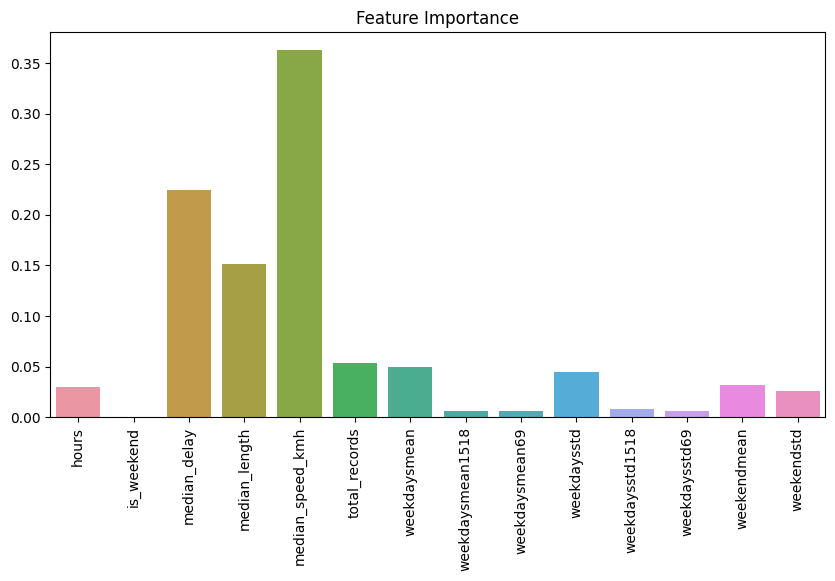

In [14]:
features = Xtest_ss.columns
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y=dctree.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()